Learn more about ADF : 
https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#When_to_Choose_ADF_or_KPSS_Test?

### Augmented Dickey-Fuller test (ADF Test) 
It is used to find of a Time Series Data is Stationary or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel('Series_2.xlsx')
#df = pd.read_excel('Series_1.xlsx') -> this data is stationary

In [3]:
df.sample(5)

,Time,Value
4,5,94
10,11,15
19,20,-56
15,16,42
1,2,120


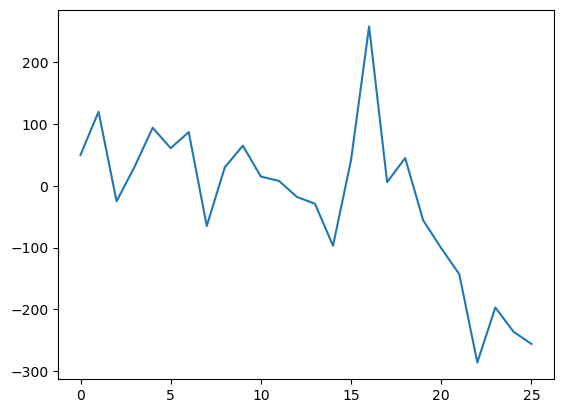

In [4]:
plt.plot(df['Value'])

The mean of the time series decreases with increase in time, so evidently this time series is not stationary in nature. We say this using observing visualization but we can be wrong. So we will be using ADF Test.

#### For any test, you have the NULL Hypothesis and Alternate Hypothesis

1. NULL Hypothesis in ADF Test : Time Series is Non-Stationary
2. Alternate Hypothesis in ADF Test : Time Series is Stationary

If ADF statistic(T-statistic) < Critical Value -> Reject the NULL Hypothesis

If ADF statistic(T-statistic) > Critical Value -> Failed to Reject the NULL Hypothesis

In [5]:
X = df['Value'].values
result = adfuller(X)
result

(-1.743414536149295,
 0.40889412299525735,
 0,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 196.27638659298424)

In [6]:
print(f'ADF Statistic: {round(result[0],6)}')
print(f'p-value: {round(result[1],6)}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key} : {round(value,3)}')

if result[0] < result[4]["5%"]:
    print("Reject NULL Hypothesis - Time Series is Stationary")
else:
    print("Failed to Reject NULL Hypothesis - Time Series is Non-Stationary")

ADF Statistic: -1.743415
p-value: 0.408894
Critical Values:
	1% : -3.724
	5% : -2.986
	10% : -2.633
Failed to Reject NULL Hypothesis - Time Series is Non-Stationary


As ADF Statistic(-1.743415) > Critical Value(-2.986), Hence the Time Series in Non-Stationary

## Now implementing the ADF TEST from Scratch

In [7]:
"""
Step 1 : The 1st step to find the ADF Statistic is to 
find out the difference between two consecutive rows 
of your time series
"""
df['Diff_Value'] = df['Value'].diff()

In [8]:
"""
Now your 'Diff_value' becomes your target variable. So 
essentially we are trying to fit a linear regression model
with the target variable(Y) being 'Diff_values'(Difference 
between two consecutive values in time series) and the X 
(independent feature) should be the time series itself.
"""
diff_values = df['Diff_Value'].values
Y = diff_values[~np.isnan(diff_values)] #removing the nan values from the target variable

In [9]:
Y

array([  70., -145.,   56.,   63.,  -33.,   26., -152.,   95.,   35.,
        -50.,   -7.,  -26.,  -11.,  -68.,  139.,  216., -252.,   39.,
       -101.,  -45.,  -42., -143.,   89.,  -39.,  -20.])

In [10]:
"""
We need to match the X and Y row count so we will drop 
the last row in X
We do this because remeber we took difference of 
2 consecutive rows to make Y so their will be a row less
"""
ts_values_orig = df['Value'].values
ts_values= ts_values_orig[:-1]

In [11]:
"""
The add_constant() function in statsmodels.api adds a constant column of 1s to 
the left-hand side of the input array or DataFrame. This creates a new variable 
that represents the intercept term in a linear regression model.
"""
X = sm.add_constant(ts_values)

In [12]:
X[:5]

array([[  1.,  50.],
       [  1., 120.],
       [  1., -25.],
       [  1.,  31.],
       [  1.,  94.]])

In [13]:
ts_values

array([  50,  120,  -25,   31,   94,   61,   87,  -65,   30,   65,   15,
          8,  -18,  -29,  -97,   42,  258,    6,   45,  -56, -101, -143,
       -286, -197, -236], dtype=int64)

In [14]:
# fit a linear regression model using OLS
model = sm.OLS(Y,X)
results = model.fit()

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.039
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0946
Time:                        15:32:56   Log-Likelihood:                -148.93
No. Observations:                  25   AIC:                             301.9
Df Residuals:                      23   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2489     19.640     -0.827      0.4

In [17]:
results.tvalues[1] #T-statistic and ADF statistic is same(their values same too)

-1.7434145361492948